In [44]:
%pylab qt
%matplotlib inline

from scipy.integrate import odeint

def plot_regime_libre(fp, Q):
    a  = -(2*np.pi*fp)**2     # g/l dans le cas du pendule
    damping = 2*np.pi*fp/Q
    f  = -damping  # frottements
    CI = [0*2*np.pi, 2]
    
    tau1 = 1/fp
    tau2 = 2*np.pi/(damping)

    tau = np.max([tau1, tau2])
    t = np.linspace(0, 3*tau,10000)

    def equation(Y,temps):                  # L'équation différentielle sous forme de fonction
        (y,dy)=Y                            # On décompose notre Y en (y,dy)
        return [dy,a*y+f*dy]           # On renvoie ce que vaut Y'

    Y, dY = odeint(equation, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
                                      # il faut rajouter .T à la fin
    
    Y  /= Y.max()
    dY /= dY.max()

    plt.figure(figsize=(15,7.5))
    sps = (2,2)
    ax1 = plt.subplot2grid(sps, (0,0))
    ax1.plot(t, Y)
    ax1.set_ylabel("Position (a.u.)")
    ax1.set_xticklabels([])
    ax1 = plt.subplot2grid(sps, (1,0))
    ax1.plot(t, dY, "C1")
    ax1.set_xlabel("Temps (s)")
    ax1.set_ylabel("Vitesse (a.u.)")
    ax2 = plt.subplot2grid(sps, (0,1), rowspan=2)
    ax2.plot(Y, dY)
    ax2.set_xlabel("Position (u.a.)")
    ax2.set_ylabel("Vitesse (u.a.)")
    ax2.set_aspect("equal")
    
def plot_excitation(fp=1, fe=1, Q=100):
    a  = -(2*np.pi*fp)**2     # g/l dans le cas du pendule
    damping = 2*np.pi*fp/Q
    f  = -damping  # frottements
    CI = [0, 0]
    tau1 = 1/fp
    tau2 = 2*np.pi/(damping)
    if fp != fe:
        tau3 = np.abs(1/(fp-fe))
    else:
        tau3=0
    tau = np.max([20*tau1, tau2, tau3])
    t = np.linspace(0, 3*tau,10000)

    def equation(Y,temps):                  # L'équation différentielle sous forme de fonction
        (y,dy)=Y                            # On décompose notre Y en (y,dy)
        return [dy,a*y+f*dy-np.sin(2*np.pi*fe*temps)]                # On renvoie ce que vaut Y'

    Y, dY = odeint(equation, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
                                      # il faut rajouter .T à la fin
        
    Y  /= Y.max()
    dY /= dY.max()

    plt.figure(figsize=(15,7.5))
    sps = (2,2)
    ax1 = plt.subplot2grid(sps, (0,0))
    ax1.plot(t, Y)
    ax1.set_ylabel("Position (a.u.)")
    ax1.set_xticklabels([])
    ax1 = plt.subplot2grid(sps, (1,0))
    ax1.plot(t, dY, "C1")
    ax1.set_ylabel("Vitesse (a.u.)")
    ax1.set_xlabel("Temps (s)")
    ax2 = plt.subplot2grid(sps, (0,1), rowspan=2)
    ax2.plot(Y, dY)
    ax2.set_xlabel("Position (u.a.)")
    ax2.set_ylabel("Vitesse (u.a.)")
    #ax2.set_aspect("equal")

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


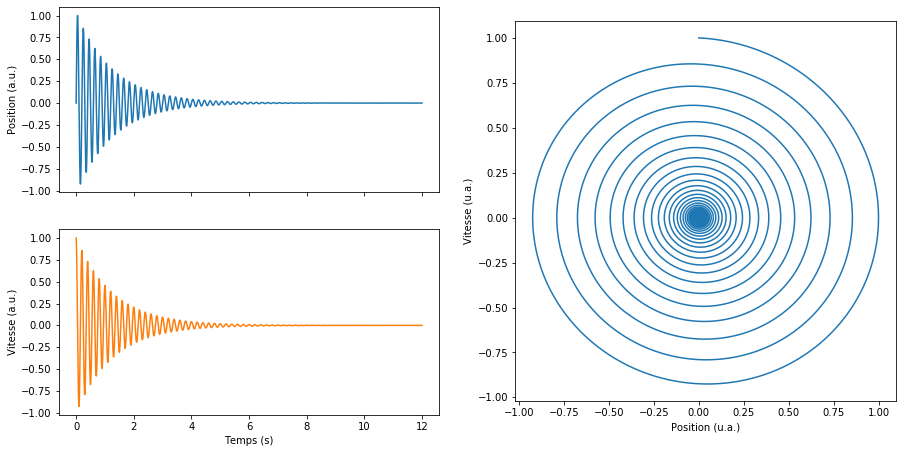

In [45]:
plot_regime_libre(fp=5, Q=20)

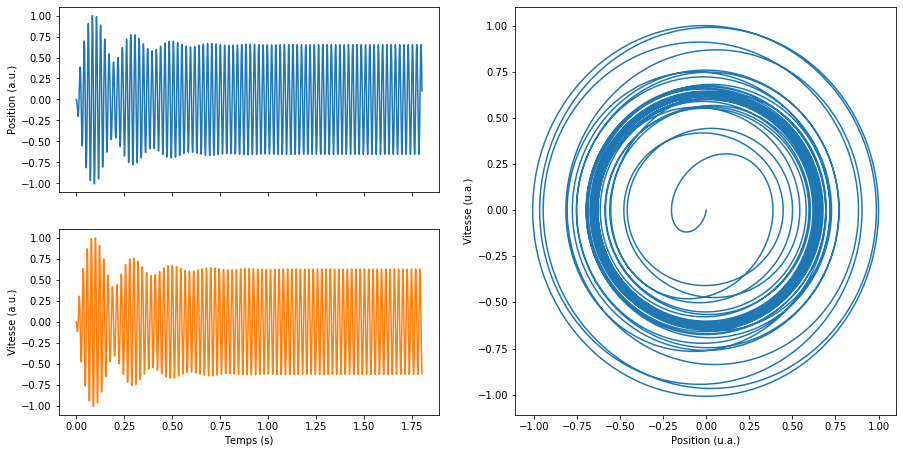

In [48]:
plot_excitation(fp=50, fe=45, Q=30)

In [50]:
l = 1
g = 9.81

omega = np.sqrt(g/l)

print(omega/2/np.pi)

0.498487916486281
